In [42]:
## Author - Nawaz Sharieff.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
##Loading Data

In [3]:
data = pd.read_csv('iris.data', header=None)

In [5]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']

In [8]:
data.columns = columns

In [9]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
##UNDERSTANDING THE DATA

In [13]:
data.shape

(150, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
print(data['class'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [16]:
data['class'] = data['class'].astype('category')

In [17]:
data.dtypes

sepal_length_cm     float64
sepal_width_cm      float64
petal_length_cm     float64
petal_width_cm      float64
class              category
dtype: object

In [18]:
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
## Exploratory Data Analysis

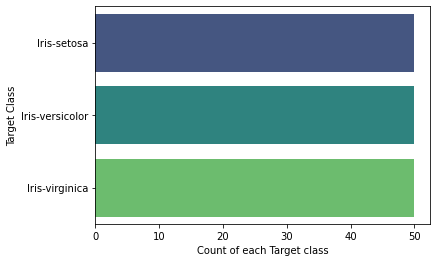

In [20]:
# Check the distribution of target variable to see if it's a case of unbalanced class
sns.countplot(y = 'class', data = data, palette="viridis")
plt.xlabel("Count of each Target class")
plt.ylabel("Target Class")
plt.show()

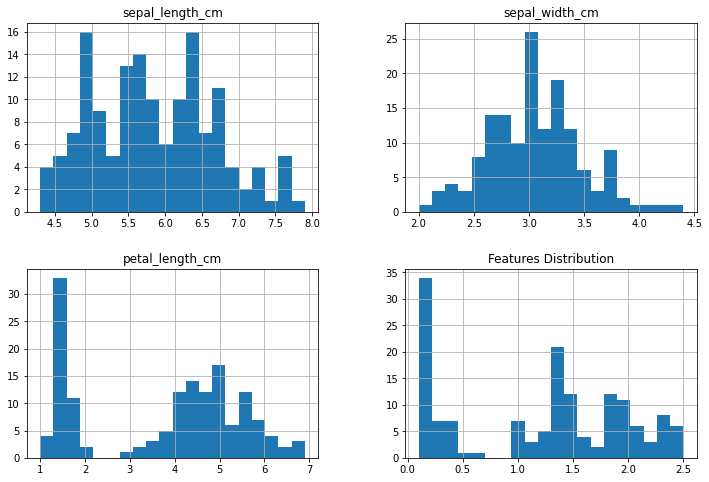

In [21]:
# Check the distribution of all the features
data.hist(figsize=(12,8), bins=20)
plt.title("Features Distribution")
plt.show()

In [22]:
# correlating the columns

data.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


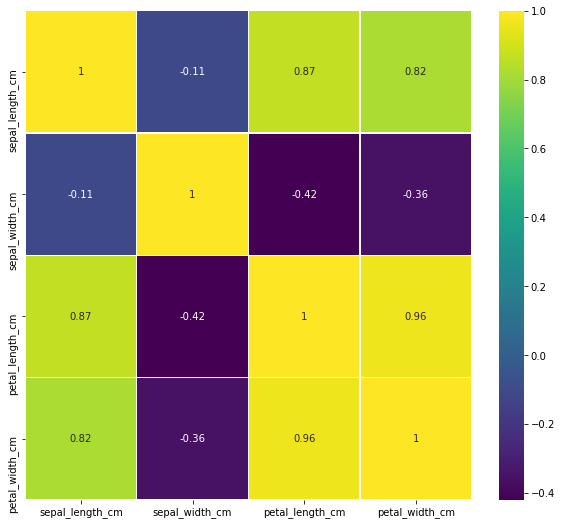

In [47]:
plt.figure(figsize=(10, 9))
sns.heatmap(data.corr(), annot=True, cmap="viridis", linewidths=0.3)
plt.show()

In [26]:
##Splitting the Data

In [25]:
X = data.drop('class', axis=1)
y = data['class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.33)

In [48]:
### MODEL BUILDING

In [29]:
knn_model = KNeighborsClassifier()
log_model = LogisticRegression()

knn_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
##Prediction and Performance Metric

In [31]:
knn_predict = knn_model.predict(X_test)
log_predict = log_model.predict(X_test)

In [32]:
##1. Accuracy

In [33]:
print(f"""
KNN Accuracy: {accuracy_score(y_test, knn_predict)},
LogisiticRegression Accuracy: {accuracy_score(y_test, log_predict)}
""")


KNN Accuracy: 0.98,
LogisiticRegression Accuracy: 0.98



In [34]:
##2. Confusion Metric

In [35]:
print(f"""
KNN Confusion Matrix: 
{confusion_matrix(y_test, knn_predict)},

LogisiticRegression Confusion Matrix: 
{confusion_matrix(y_test, log_predict)}
""")


KNN Confusion Matrix: 
[[17  0  0]
 [ 0 16  1]
 [ 0  0 16]],

LogisiticRegression Confusion Matrix: 
[[17  0  0]
 [ 0 16  1]
 [ 0  0 16]]



In [36]:
##3. Classification Report

In [37]:
print(f"""
KNN Classification Report: 
{classification_report(y_test, knn_predict)},

LogisiticRegression Classification Report: 
{classification_report(y_test, log_predict)}
""")


KNN Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50
,

LogisiticRegression Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50




In [39]:
##Conclusion:
##Both KNN and LogisticRegression model are working in same manner. We can go with any of them as it is very small dataset, their accuracies are resulting very well.